<a href="https://colab.research.google.com/github/riti1302/Digit_Recognition/blob/master/DigitRecognition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

np.random.seed(25)

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
X_train (60000, 28, 28)
y_train (60000,)
X_test (10000, 28, 28)
y_test (10000,)


Text(0.5, 1.0, 'Class 5')

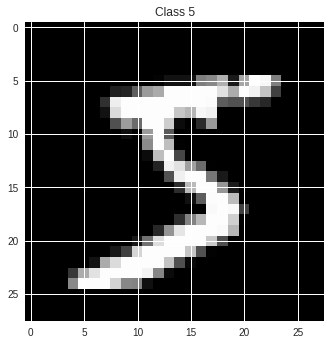

In [0]:
plt.imshow(X_train[0], cmap = 'gray')
plt.title('Class '+str(y_train[0]))

In [0]:
  X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
  X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
  
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')
  
  X_train/=255
  X_test/=255
 
  X_train.shape
  

(60000, 28, 28, 1)

In [0]:
  from keras.utils import np_utils
  
  number_of_classes = 10
  Y_train = np_utils.to_categorical(y_train, number_of_classes)
  Y_test = np_utils.to_categorical(y_test, number_of_classes)
  
  y_train[0], Y_train[0]

Using TensorFlow backend.


(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [0]:
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_11 (Activation)   (None, 10, 10, 64)        0         
__________

In [0]:
model.compile(loss= 'categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.0125 - acc: 0.9962 - val_loss: 0.0254 - val_acc: 0.9922
Epoch 2/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.0117 - acc: 0.9963 - val_loss: 0.0306 - val_acc: 0.9914
Epoch 3/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.0100 - acc: 0.9968 - val_loss: 0.0338 - val_acc: 0.9912
Epoch 4/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.0084 - acc: 0.9971 - val_loss: 0.0244 - val_acc: 0.9934
Epoch 5/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.0079 - acc: 0.9975 - val_loss: 0.0265 - val_acc: 0.9925
Epoch 6/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.0074 - acc: 0.9977 - val_loss: 0.0264 - val_acc: 0.9929
Epoch 7/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.0054 - acc: 0.9982 - val_loss: 0.0394 - 

In [0]:
accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

10000/10000 [==============================] - 1s 101us/step
[0.01996440421201769, 0.9931]
